In [64]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics
from sklearn.utils import resample
# import featuretools as ft

## Read the data

In [2]:
d = pd.read_excel('default of credit card clients.xls', header=1)

In [3]:
d.set_index('ID')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


## EDA

In [31]:
def data_desc(d):
    print('the no. of columsn are: ',len(d.columns))
    print('The distinct column types are: ', )
    for i in d.columns:
        print('The column ',i, 'is of ',d.loc[:,i].dtype)
data_desc(d)

the no. of columsn are:  25
The column  ID is of  int64
The column  LIMIT_BAL is of  int64
The column  SEX is of  int64
The column  EDUCATION is of  int64
The column  MARRIAGE is of  int64
The column  AGE is of  int64
The column  PAY_0 is of  int64
The column  PAY_2 is of  int64
The column  PAY_3 is of  int64
The column  PAY_4 is of  int64
The column  PAY_5 is of  int64
The column  PAY_6 is of  int64
The column  BILL_AMT1 is of  int64
The column  BILL_AMT2 is of  int64
The column  BILL_AMT3 is of  int64
The column  BILL_AMT4 is of  int64
The column  BILL_AMT5 is of  int64
The column  BILL_AMT6 is of  int64
The column  PAY_AMT1 is of  int64
The column  PAY_AMT2 is of  int64
The column  PAY_AMT3 is of  int64
The column  PAY_AMT4 is of  int64
The column  PAY_AMT5 is of  int64
The column  PAY_AMT6 is of  int64
The column  default payment next month is of  int64


Essential stats of the data

In [26]:
d.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Finding out if columns are correlated

Visualization: https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

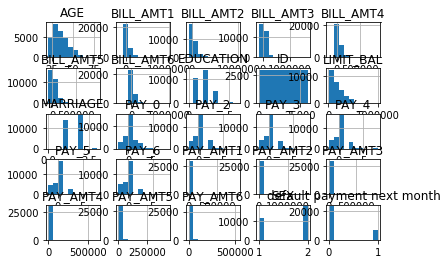

<Figure size 576x432 with 0 Axes>

In [21]:
# plt.figure(figsize=(8, 6))
# d.hist()
# plt.figure(figsize=(8, 6))
# plt.show()

Correlation matrix plot: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

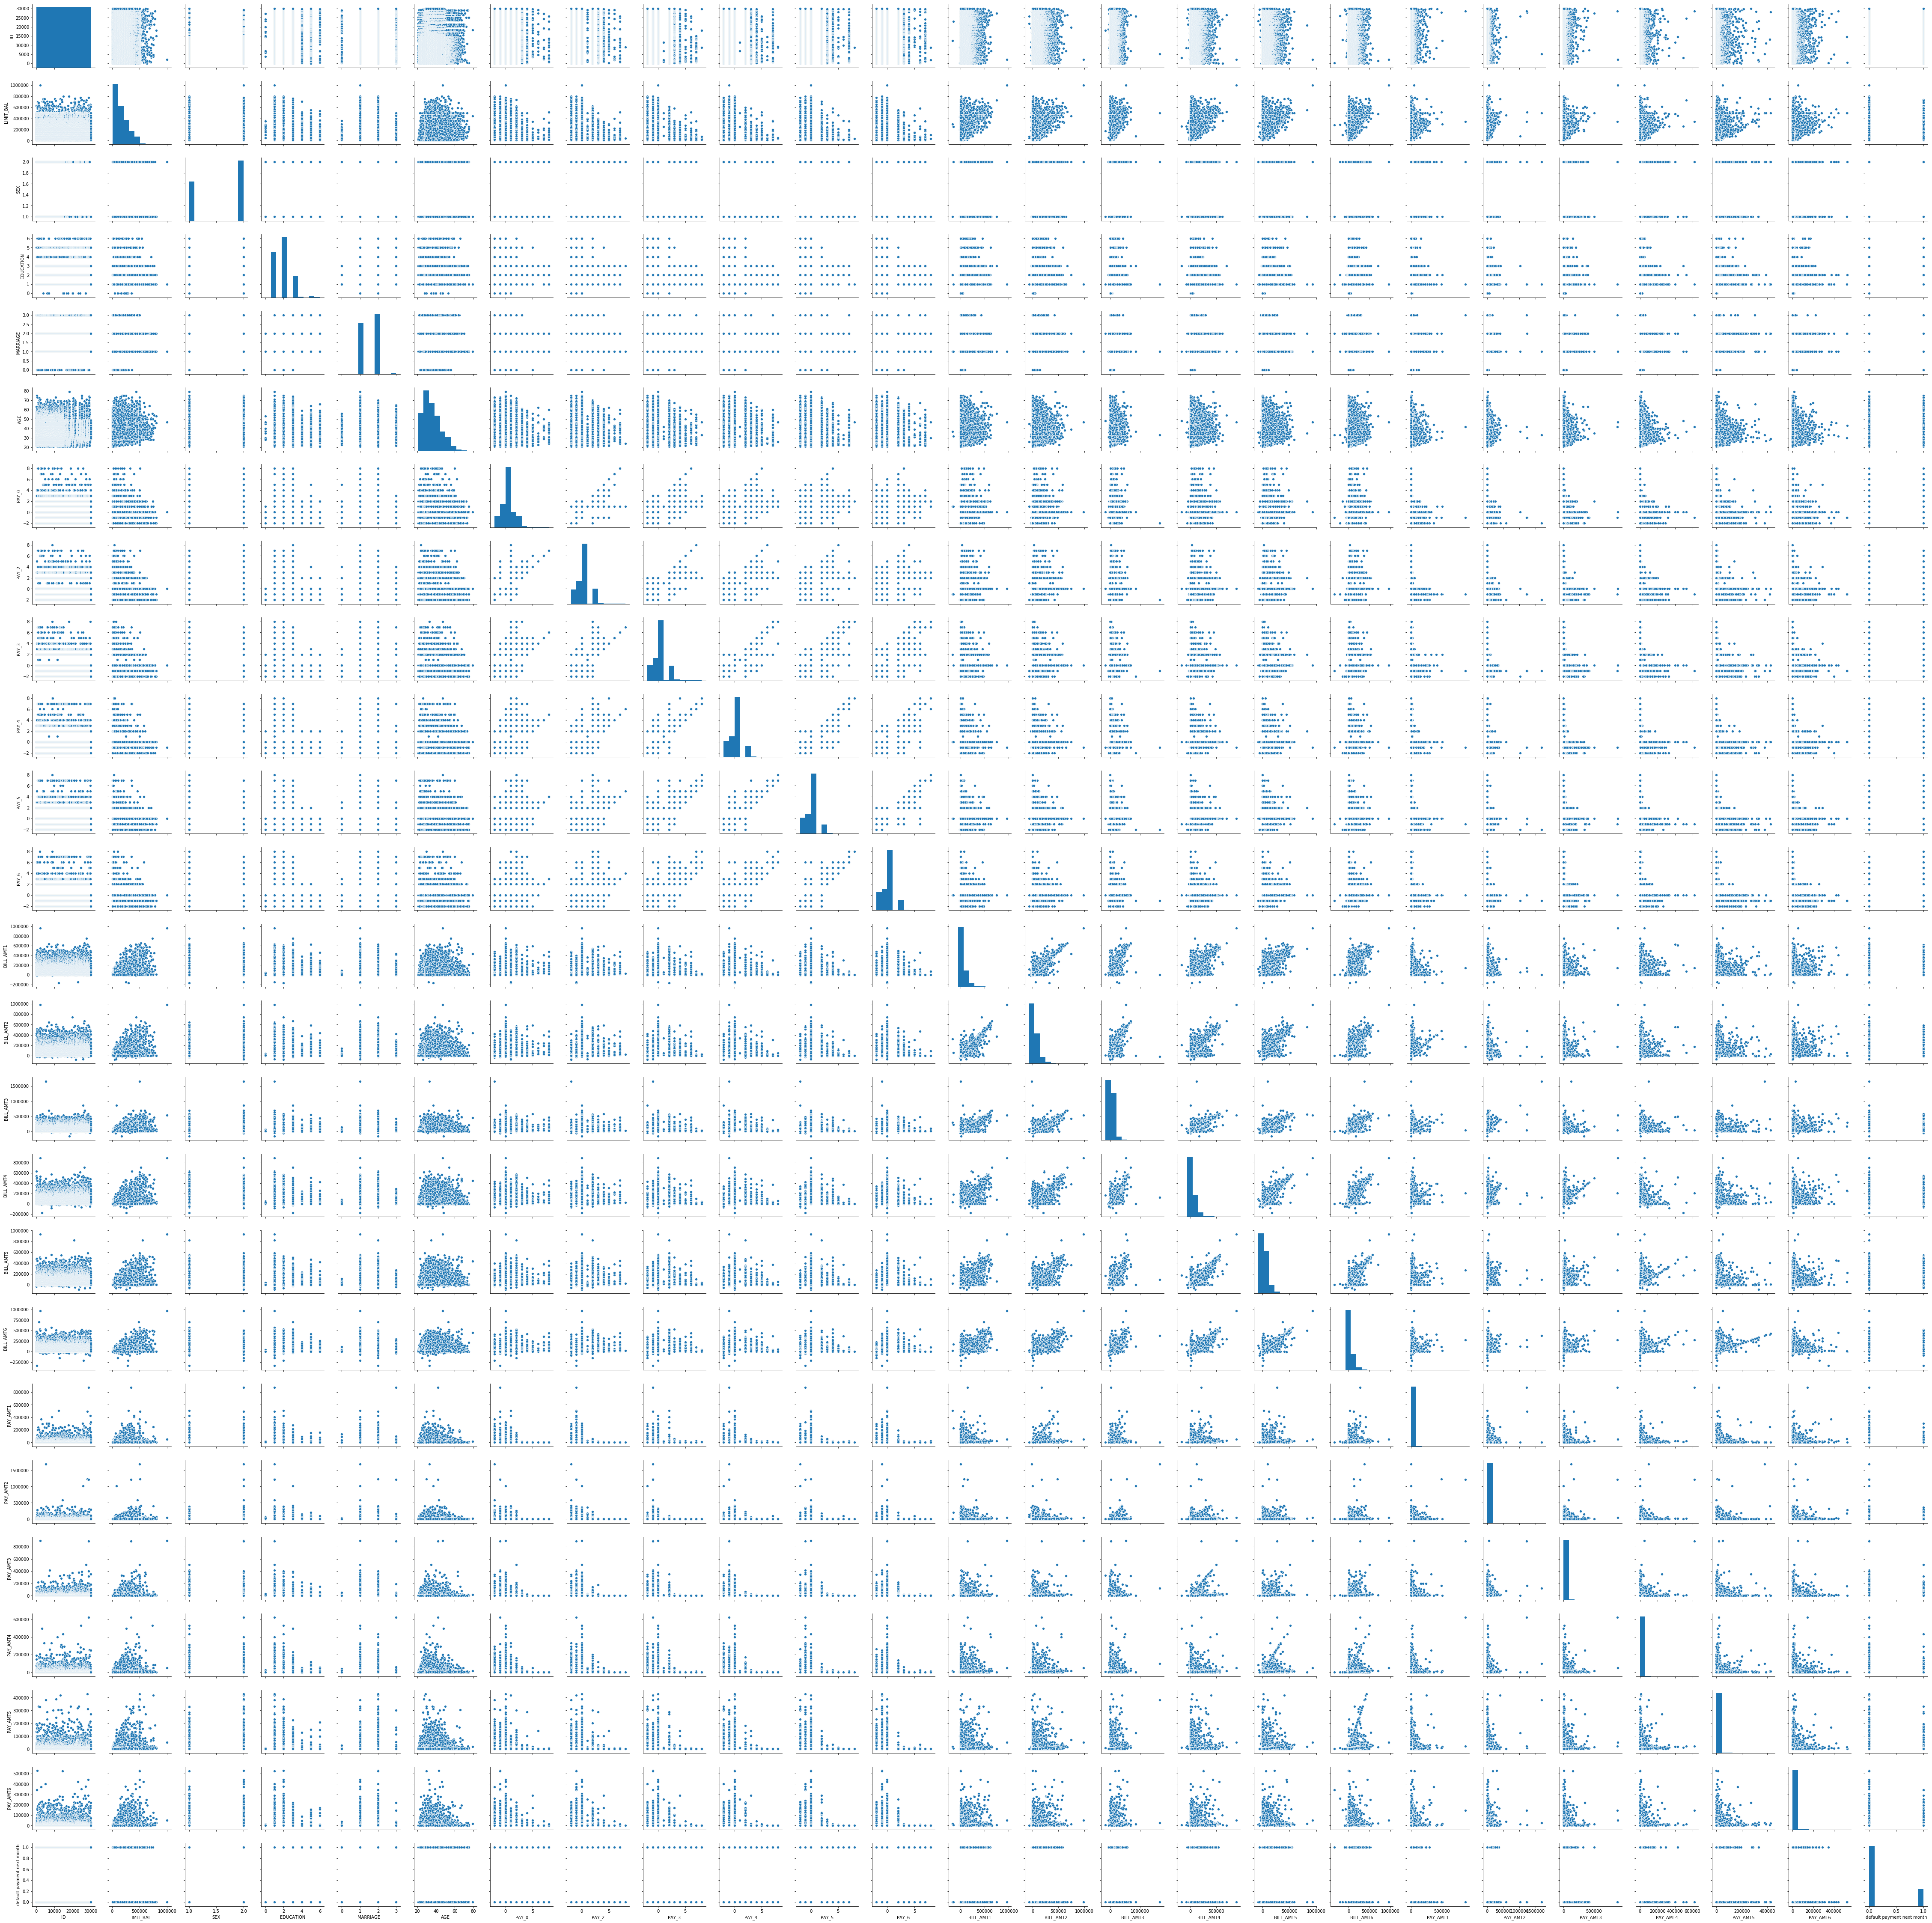

In [27]:
#sns.pairplot(d)

In [88]:
corr = d.corr()
print(type(corr))

<class 'pandas.core.frame.DataFrame'>


### Missing values

In [84]:
def missing_values(d):
    null_cols = d.loc[:,d.isnull().sum() != 0].isnull().sum()
    if t1.empty:
        print('There are no null columns in the data')
    else:
        print(null_cols.sort_values(axis=0))
missing_values(d)

There are no null columns in the data


### Finding if categorical columns are there

To find out the number of unique columsn in the data for each of the columns I used list comprehension. <br>
List comprehension in python: https://caisbalderas.com/blog/iterating-with-python-lambdas/ 

In [57]:
[[i, d[i].nunique()] for i in d.columns]

[['ID', 30000],
 ['LIMIT_BAL', 81],
 ['SEX', 2],
 ['EDUCATION', 7],
 ['MARRIAGE', 4],
 ['AGE', 56],
 ['PAY_0', 11],
 ['PAY_2', 11],
 ['PAY_3', 11],
 ['PAY_4', 11],
 ['PAY_5', 10],
 ['PAY_6', 10],
 ['BILL_AMT1', 22723],
 ['BILL_AMT2', 22346],
 ['BILL_AMT3', 22026],
 ['BILL_AMT4', 21548],
 ['BILL_AMT5', 21010],
 ['BILL_AMT6', 20604],
 ['PAY_AMT1', 7943],
 ['PAY_AMT2', 7899],
 ['PAY_AMT3', 7518],
 ['PAY_AMT4', 6937],
 ['PAY_AMT5', 6897],
 ['PAY_AMT6', 6939],
 ['default payment next month', 2]]

In [70]:
def find_cat_cols(d, cutoff_criteria):
    '''
    Returns the column names with number of unique values less than the cutoff criteria number
    '''    
    uniq_col_count = d.nunique()    
    cat_vars = uniq_col_count[uniq_col_count<cutoff_criteria]
    print('The columns less than', cutoff_criteria, 'features are: \n', cat_vars)

In [72]:
find_cat_cols(d,10)

The columns less than 10 features are: 
 SEX                           2
EDUCATION                     7
MARRIAGE                      4
default payment next month    2
dtype: int64


The categorical columns are: SEX, EDUCATION, MARRIAGE. From data description the columns with names prefix 'PAY_' are also categorical

### Encoding categorical columns

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above <br><br>
**How are numbers assigned to the history of payment columns**<br>
There are 11 classes of customers. The greater the number, the greater the probability of defaulting


In the later methods we can add some additional features. For example one feature that I see that can add more information is the total number of delayed months give by the sum of the columsn X6-X11. The higher the number, the higher the chances of defaulting. 

#### Split the data into training, validation and test dataset

randomly split the data into training and testing sets, training = 60%, test, validation 20% each

In [99]:
train, validate, test = np.split(d.sample(frac=1), [int(.6*len(d)), int(.8*len(d))])

In [101]:
test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8083,8084,220000,1,1,1,36,-1,-1,-1,-1,...,1350,925,11597,4880,2267,1350,0,11597,178577,0
17662,17663,500000,2,3,2,46,-1,0,-1,-1,...,310852,301854,133761,15000,1558,310852,10000,5000,5000,0
11797,11798,120000,2,2,1,33,0,0,0,0,...,57873,61917,63880,5000,5000,5000,5000,3000,3000,0
24512,24513,280000,1,1,2,36,-2,-2,-2,-2,...,55176,5950,289,1979,500,55176,5950,289,6757,0
11817,11818,30000,2,2,1,23,2,2,2,2,...,30892,30500,0,3300,0,2500,0,0,0,0


## Machine Learning

#### Logistic regression

Since this is a binary classification problem, Logistic regression is first tested to see how well a simple model performs in this case. We will use L2 regularization. Few notes from sklearn documentation itself about logistic regression: 

    For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
    ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.


In [ ]:
def log_reg_model(data, C):
    X = data.loc[:,data.columns != 'default payment next month']
    y = data.loc[:,data.columns == 'default payment next month']
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
    

pandas and sklearn have interaction problems. pandas series is also a 2D array with the first coulmn as index. in sklearn models such as logistic regression it needs the input array in the shape (n_samples, ). So the pandas series has to be converted into this shape

In [150]:
data = train
X = data.loc[:,data.columns != 'default payment next month'].values
y = data.loc[:,data.columns == 'default payment next month'].values.reshape(len(y.values),)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [145]:
for i, C in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
#     fpr_l1_LR, tpr_l1_LR = roc_curve(y_test, y_pred_l1_LR)
#     fpr_l2_LR, tpr_l2_LR = roc_curve(y_test, y_pred_l2_LR)
#     y_pred_l1_LR = clf_l1_LR.predict(X_test)
#     y_pred_l2_LR =  clf_l2_LR.predict(X_test)    
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X_test, y_test))    
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X_test, y_test))
    
#     # Plotting
#     l1_plot = plt.subplot(3, 2, 2 * i + 1)
#     l2_plot = plt.subplot(3, 2, 2 * (i + 1))
#     if i == 0:
#         l1_plot.set_title("L1 penalty")
#         l2_plot.set_title("L2 penalty")

# #     l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
# #                    cmap='binary', vmax=1, vmin=0)
# #     l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
# #                    cmap='binary', vmax=1, vmin=0)
# #     plt.text(-8, 3, "C = %.2f" % C)

#     l1_plot.set_xticks(())
#     l1_plot.set_yticks(())
#     l2_plot.set_xticks(())
#     l2_plot.set_yticks(())
    

score with L1 penalty: 0.7842
score with L2 penalty: 0.7842
score with L1 penalty: 0.7842
score with L2 penalty: 0.7842
score with L1 penalty: 0.7842
score with L2 penalty: 0.7842


#### SVM classifier

Scaling of the data is important in SVM. More here: https://neerajkumar.org/writings/svm/ <br>
Scikit learn: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

If the data has to be scaled then how do we handle categorical data?
https://stats.stackexchange.com/questions/52915/how-to-deal-with-an-svm-with-categorical-attributes
https://sebastianraschka.com/faq/docs/svm_for_categorical_data.html
This says that if the categorical variables are ordinals then the data is good for SVM

In [7]:
data = d.copy()
X = data.loc[:,data.columns != 'default payment next month'].values
y = data.loc[:,data.columns == 'default payment next month'].values
y = y.reshape(len(y),)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

Let's fit a radial basis function SVM and then use balanced data to see how the performance improves.

In [10]:
clf = svm.SVC(kernel='rbf',gamma=10)

In [11]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = clf.predict(X_test)

Metrics for SVM: https://scikit-learn.org/stable/modules/model_evaluation.html

In [16]:
metrics.accuracy_score(y_test, y_pred)

0.78202020202020206

### How to improve the fit

Observed that there are few things that I can explore further to develop my understanding of SVM further: <br>
1) How does the target data being unbalanced affect the classification? https://elitedatascience.com/imbalanced-classes
https://stats.stackexchange.com/questions/94295/svm-for-unbalanced-data <br>
2) How does standard scaling of the data affect the classification? https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/ <br>
3) Hyper-parameter tuning - Which Kernel and what values of C and gamma <br>
4) What metrics should I use to judge the goodness of the model? <br><br>
A very good explanation of the various metrics and their connections with SVM: https://stats.stackexchange.com/questions/73537/choosing-a-classification-performance-metric-for-model-selection-feature-select

#### 1. Balancing the classes

SVM depends on whether the data is balanced for the classes we're trying to classify. So let's check if the current data is balanced

In [9]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [9]:
d_major_class = d[d['default payment next month']==0]
d_minor_class = d[d['default payment next month']==1]

In [10]:
# Downsample major class
d_major_class_downsampled = resample(d_major_class, replace=False, n_samples = d_minor_class.shape[0], random_state = 999)

In [12]:
# Now concatenate the minor and downsampled major class datasets into one
d_downsampled = pd.concat([d_major_class_downsampled, d_minor_class])

# Value counts of the downsampled dataset
d_downsampled['default payment next month'].value_counts()

1    6636
0    6636
Name: default payment next month, dtype: int64

Now we see that the classes are balanced. Now let's fit SVM model to this dataset.

In [16]:
def svm_classifier(data, test_train_split_ratio, kernel):
    #Splitting the data into training and test sets
    X = data.loc[:,data.columns != 'default payment next month'].values
    y = data.loc[:,data.columns == 'default payment next month'].values
    y = y.reshape(len(y),)
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_train_split_ratio, random_state=42)    
    clf = svm.SVC(kernel=kernel,gamma=10)
    clf.fit(X_train, y_train)    
    # Prediciting using the model
    y_pred = clf.predict(X_test)    
    # Metrics
    print("Accuracy using",kernel,"is-",metrics.accuracy_score(y_test, y_pred))

#     #Building the model
#     for kernel in enumerate(('linear', 'rbf', 'poly')):
#         clf = svm.SVC(kernel=kernel, gamma=10)
#         clf.fit(X_train, y_train)    
#         # Prediciting using the model
#         y_pred = clf.predict(X_test)    
#         # Metrics
#         print("For kernel-",kernel,"accuracy is-",metrics.accuracy_score(y_test, y_pred))

In [ ]:
svm_classifier(d_downsampled, 0.33)

In [17]:
%%time
svm_classifier(d_downsampled, 0.33, 'rbf')

Accuracy using rbf is- 0.496347031963
Wall time: 12.7 s


SVM classifier took a long time to run. Here are some discussions on it: https://stackoverflow.com/questions/18165213/how-much-time-does-take-train-svm-classifier<br>
The factor C, kernel(rbf the most complicated one) and data size are the chief factors. <br>
I observed that the radial basis function kernel runs much faster compared to the linear kernel.

#### 2. Standard scaling

This stack overflwow reply solved a major issue in applying a scaler to the numeric data column. Previously I was trying to separate the numeric columns and then using concat method for pandas to join it wiht the non-numeric columns. This returned nulls in all the rows for non-numeric columns because the numeric columns did not have an index column which is non-numeric. 

https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn

In [4]:
num_cols = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [68]:
data = d.copy() 

How to change data type of multiple columns in pandas dataframe: https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas <br>
How to standardize only numeric columns: https://stackoverflow.com/questions/48673402/how-can-i-standardize-only-numeric-variables-in-an-sklearn-pipeline?noredirect=1&lq=1

In [71]:
def svm_classifier_scaler(data, num_cols, test_train_split_ratio, kernel):
    # Min Max scaler
    scaler = MinMaxScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])
    #Splitting the data into training and test sets
    X = data.loc[:,data.columns != 'default payment next month'].values
    y = data.loc[:,data.columns == 'default payment next month'].values
    y = y.reshape(len(y),)
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_train_split_ratio, random_state=42)    
    clf = svm.SVC(kernel=kernel,gamma=10)
    clf.fit(X_train, y_train)    
    # Prediciting using the model
    y_pred = clf.predict(X_test)    
    # Metrics
    print("Accuracy using",kernel,"is-",metrics.accuracy_score(y_test, y_pred))

In [72]:
%%time
svm_classifier_scaler(data, num_cols, 0.33, 'rbf')

Accuracy using rbf is- 0.7820202020202021
Wall time: 7min 26s


Compared to the previous application of SVM to unsacled numeric data, this is abi improvement. <br>

Now we know that SVM is a classfication method. It classifies the data in a multi-dimensional space. It would be interesting to see the effect of dimensionality reduction using PCA to see if we can improve on the classification.

#### Dimensionality reduction<br>

https://scikit-learn.org/stable/modules/unsupervised_reduction.html

In [73]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:
d1 = d.copy()
num_cols = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'] #numeric columns in the data
n_features = len(num_cols) #number of features that we want to run the pca on

In [76]:
# Scale the data
def minMaxScaler(data, numeric_cols):
    scaler = MinMaxScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])
    return(data)
d1_scaled = minMaxScaler(d1, num_cols)

C:\Users\Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Refer to the scikit leran doc which says that for large datasets on which we are trying to apply rbf svm, randomized is the better algorithm as it drops singular vectors

In [78]:
d2 = d1[num_cols].copy()

In [ ]:

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

Some nice articles on feature selection for the Kaggle Credit defaulter dataset, which is much more complex problem as it consists of multiple datasets that need to be joined. 

#### RBF SVM parameters

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py